In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
transaction_file = "transaction_data.csv"
purchase_file = "purchase_behaviour.csv"

transaction_data = pd.read_csv(transaction_file)
purchase_behaviour = pd.read_csv(purchase_file)

In [3]:
merged_data = transaction_data.merge(purchase_behaviour, on="LYLTY_CARD_NBR")

In [4]:
top_products = (
    merged_data.groupby("PROD_NAME")["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

In [5]:
loyal_customers = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["TOT_SALES"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

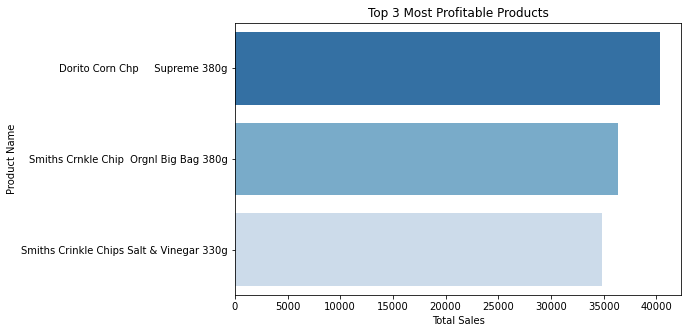

In [6]:
plt.figure(figsize=(8, 5))
sns.barplot(x=top_products.values, y=top_products.index, palette="Blues_r")
plt.xlabel("Total Sales")
plt.ylabel("Product Name")
plt.title("Top 3 Most Profitable Products")
plt.show()


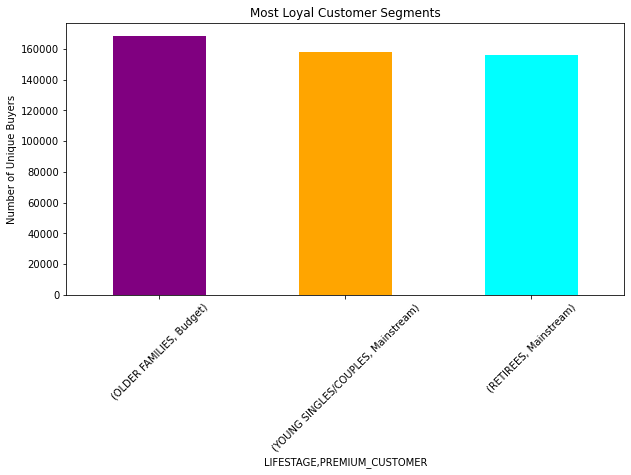

In [13]:
plt.figure(figsize=(10, 5))
loyal_customers.plot(kind='bar', color=['purple', 'orange', 'cyan'])
plt.title("Most Loyal Customer Segments")
plt.ylabel("Number of Unique Buyers")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Display results
print("Top 3 Most Profitable Products:\n", top_products)
print("\nTop 3 Most Loyal Customer Segments:\n", loyal_customers)

Top 3 Most Profitable Products:
 PROD_NAME
Dorito Corn Chp     Supreme 380g            40352.0
Smiths Crnkle Chip  Orgnl Big Bag 380g      36367.6
Smiths Crinkle Chips Salt & Vinegar 330g    34804.2
Name: TOT_SALES, dtype: float64

Top 3 Most Loyal Customer Segments:
 LIFESTAGE              PREMIUM_CUSTOMER
OLDER FAMILIES         Budget              168363.25
YOUNG SINGLES/COUPLES  Mainstream          157621.60
RETIREES               Mainstream          155677.05
Name: TOT_SALES, dtype: float64
